# Practice 2.
##  Objectives:
1. Learn to clean data with pandas.

2. Do a simple Linear regression

## Aplication:
Data basse: Data set from the UCI Machine Learning Repository
(http://archive.ics.uci.edu/ml)
1.   Cars data: http://archive.ics.uci.edu/ml/datasets/Automobile.
- Predict **price** in dollars.

2. Database: Wine quality, http://archive.ics.uci.edu/ml/datasets/Wine+Quality
- Predict **quality** (score between 0 and 10)


___________________________________

## First we load the Libraries
* Pandas: For dealing with tabulated data: excel + sql
* sklearn: Machine learning framework
* os: anciliary functions for dealing with the operating system

In [1]:
import pandas as pd
import os 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn

### Use the os library for generating the path to the file

In [3]:
File = "Bdcars.csv"
Filename = os.path.join(os.getcwd(),'Data',File)
print(f'Filename with path: \n {Filename}')

Filename with path: 
 C:\Users\raulc\Desktop\Master\Q2\ML\SecondPractice\Data\Bdcars.csv


### First rows of the file
**make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price**

alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495

alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500

alfa-romero,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500

### Load the data by means of Pandas
- Note that the structure is a csv: Comma separated values
- The library recognizes the first line as the name of the columns
- Note the similarity with an *excel file*

#  See Appendix for  the meaning of the variables.

In [4]:
Data = pd.read_csv(Filename)
Data.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
print(f'Size of the database: {Data.shape} (rows X columns)')

Size of the database: (205, 24) (rows X columns)


## Next we get general information about the dataf33rame
## Dtype -> will allow to see which transformations should be done

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0    make               205 non-null    object 
 1    fuel-type          205 non-null    object 
 2    aspiration         205 non-null    object 
 3    num-of-doors       205 non-null    object 
 4    body-style         205 non-null    object 
 5    drive-wheels       205 non-null    object 
 6    engine-location    205 non-null    object 
 7    wheel-base         205 non-null    float64
 8    length             205 non-null    float64
 9    width              205 non-null    float64
 10   height             205 non-null    float64
 11   curb-weight        205 non-null    int64  
 12   engine-type        205 non-null    object 
 13   num-of-cylinders   205 non-null    object 
 14   engine-size        205 non-null    int64  
 15   fuel-system        205 non-null    object 
 16   bore   

## First we clean the price feature
###  We erraise the unknowns '?'

In [7]:
Data =Data[Data[' price'] != '?']
Data[' price'] = Data[' price'].astype('float')
print('*'*30)
print('Shape of the data: ',Data.shape)
print('*'*30)
Data.info()

******************************
Shape of the data:  (201, 24)
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0    make               201 non-null    object 
 1    fuel-type          201 non-null    object 
 2    aspiration         201 non-null    object 
 3    num-of-doors       201 non-null    object 
 4    body-style         201 non-null    object 
 5    drive-wheels       201 non-null    object 
 6    engine-location    201 non-null    object 
 7    wheel-base         201 non-null    float64
 8    length             201 non-null    float64
 9    width              201 non-null    float64
 10   height             201 non-null    float64
 11   curb-weight        201 non-null    int64  
 12   engine-type        201 non-null    object 
 13   num-of-cylinders   201 non-null    object 
 14   engine-size  

## Next we deal with the categorical data.
###  Get the unique data, observe the return object is a Numpy Array of objects (strings)
###  Note: This can be done in a more straight forward way, but  the idea is to get used with the basics of pandas.

In [8]:
NamesMake = Data[' make'].unique()
print(NamesMake)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


###  We create a code for each of the makes.
**NOTE**:  Categorical features, there is no order. 
**SOLUTION**: Will be given in decision trees.

### We use an implementation of 'dict comprehension' and '.map()'

In [9]:
CodeMake = list(range(len(NamesMake)))

MappingName2code = {key:float(val) for (key,val)  in zip(NamesMake,CodeMake)}
print(MappingName2code)

{'alfa-romero': 0.0, 'audi': 1.0, 'bmw': 2.0, 'chevrolet': 3.0, 'dodge': 4.0, 'honda': 5.0, 'isuzu': 6.0, 'jaguar': 7.0, 'mazda': 8.0, 'mercedes-benz': 9.0, 'mercury': 10.0, 'mitsubishi': 11.0, 'nissan': 12.0, 'peugot': 13.0, 'plymouth': 14.0, 'porsche': 15.0, 'renault': 16.0, 'saab': 17.0, 'subaru': 18.0, 'toyota': 19.0, 'volkswagen': 20.0, 'volvo': 21.0}


In [10]:
Data[' make'].map(MappingName2code)

0       0.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
200    21.0
201    21.0
202    21.0
203    21.0
204    21.0
Name:  make, Length: 201, dtype: float64

In [11]:
Data[' make'] = Data[' make'].map(MappingName2code)
Data.T.head()

,0,1,2,3,4,5,6,7,8,10,...,195,196,197,198,199,200,201,202,203,204
make,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0
fuel-type,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,gas,gas,gas,gas,gas,diesel,gas
aspiration,std,std,std,std,std,std,std,std,turbo,std,...,std,std,std,turbo,turbo,std,turbo,std,turbo,turbo
num-of-doors,two,two,two,four,four,two,four,four,four,two,...,four,four,four,four,four,four,four,four,four,four
body-style,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,sedan,...,wagon,sedan,wagon,sedan,wagon,sedan,sedan,sedan,sedan,sedan


 ### Excercise: <font color='red'>Correct all the categorical fields </font>
 Note: In case there is an order, such as **num-of-doors** make a coding that follows the order.

We first deal with numerical data that is classified as object, like we did in the first practice.

In [12]:
Data =Data[Data[' bore'] != '?']
Data =Data[Data[' stroke'] != '?']
Data =Data[Data[' horsepower'] != '?']
Data =Data[Data[' peak-rpm'] != '?']

Data[' bore'] = Data[' bore'].astype('float')
Data[' stroke'] = Data[' stroke'].astype('float')
Data[' horsepower'] = Data[' horsepower'].astype('float')
Data[' peak-rpm'] = Data[' peak-rpm'].astype('float')

In [13]:
categorical_fields = Data.select_dtypes(include=['object']).columns.tolist()
print(categorical_fields)

[' fuel-type', ' aspiration', ' num-of-doors', ' body-style', ' drive-wheels', ' engine-location', ' engine-type', ' num-of-cylinders', ' fuel-system']


We deal with special features first like number of doors or cylinders.

In [14]:
Data =Data[Data[' num-of-cylinders'] != '?']
NamesMake = Data[' num-of-cylinders'].unique()
NamesMake

array(['four', 'six', 'five', 'three', 'twelve', 'eight'], dtype=object)

In [15]:
CodeMake = [4,6,5,3,12,8]
MappingName2code = {key:float(val) for (key,val)  in zip(NamesMake,CodeMake)}
Data[' num-of-cylinders'] = Data[' num-of-cylinders'].map(MappingName2code)
Data[' num-of-cylinders']

0      4.0
1      4.0
2      6.0
3      4.0
4      5.0
      ... 
200    4.0
201    4.0
202    6.0
203    6.0
204    4.0
Name:  num-of-cylinders, Length: 195, dtype: float64

In [16]:
Data =Data[Data[' num-of-doors'] != '?']
NamesMake = Data[' num-of-doors'].unique()
NamesMake

array(['two', 'four'], dtype=object)

In [17]:
CodeMake = [2,4]
MappingName2code = {key:float(val) for (key,val)  in zip(NamesMake,CodeMake)}
Data[' num-of-doors'] = Data[' num-of-doors'].map(MappingName2code)
Data[' num-of-doors']

0      2.0
1      2.0
2      2.0
3      4.0
4      4.0
      ... 
200    4.0
201    4.0
202    4.0
203    4.0
204    4.0
Name:  num-of-doors, Length: 193, dtype: float64

The rest of categorical features don't follow any given pattern with their modalities, thus we approach the problem iteratively.

In [18]:
categorical_fields = Data.select_dtypes(include=['object']).columns.tolist()
print(categorical_fields)

[' fuel-type', ' aspiration', ' body-style', ' drive-wheels', ' engine-location', ' engine-type', ' fuel-system']


In [19]:
for feature in categorical_fields:
    Data =Data[Data[feature] != '?']
    NamesMake = Data[feature].unique()
    CodeMake = list(range(len(NamesMake)))
    MappingName2code = {key:float(val) for (key,val)  in zip(NamesMake,CodeMake)}
    Data[feature] = Data[feature].map(MappingName2code)

All the features have been converted into numerical datatypes.

In [20]:
categorical_fields = Data.select_dtypes(include=['object']).columns.tolist()
print(categorical_fields)

[]


In [21]:
Data.head().T

,0,1,2,3,4
make,0.00,0.00,0.00,1.00,1.00
fuel-type,0.00,0.00,0.00,0.00,0.00
aspiration,0.00,0.00,0.00,0.00,0.00
num-of-doors,2.00,2.00,2.00,4.00,4.00
body-style,0.00,0.00,1.00,2.00,2.00
drive-wheels,0.00,0.00,0.00,1.00,2.00
engine-location,0.00,0.00,0.00,0.00,0.00
wheel-base,88.60,88.60,94.50,99.80,99.40
length,168.80,168.80,171.20,176.60,176.60
width,64.10,64.10,65.50,66.20,66.40


 ### Next we will eraise the columns that have not been corrected.
 ### Also will correct the integers to floats.

In [22]:
Data.columns

Index([' make', ' fuel-type', ' aspiration', ' num-of-doors', ' body-style',
       ' drive-wheels', ' engine-location', ' wheel-base', ' length', ' width',
       ' height', ' curb-weight', ' engine-type', ' num-of-cylinders',
       ' engine-size', ' fuel-system', ' bore', ' stroke',
       ' compression-ratio', ' horsepower', ' peak-rpm', ' city-mpg',
       ' highway-mpg', ' price'],
      dtype='object')

In [23]:
TypeOfColumn = Data.dtypes
print(TypeOfColumn)

 make                 float64
 fuel-type            float64
 aspiration           float64
 num-of-doors         float64
 body-style           float64
 drive-wheels         float64
 engine-location      float64
 wheel-base           float64
 length               float64
 width                float64
 height               float64
 curb-weight            int64
 engine-type          float64
 num-of-cylinders     float64
 engine-size            int64
 fuel-system          float64
 bore                 float64
 stroke               float64
 compression-ratio    float64
 horsepower           float64
 peak-rpm             float64
 city-mpg               int64
 highway-mpg            int64
 price                float64
dtype: object


In [24]:
cols2drop = list()
for col,dtype in zip(Data.columns,TypeOfColumn):
    print(f' Name of columns:{col}   \t||| Type of column: {dtype}')
    if dtype == 'object':
        cols2drop.append(col)

 Name of columns: make   	||| Type of column: float64
 Name of columns: fuel-type   	||| Type of column: float64
 Name of columns: aspiration   	||| Type of column: float64
 Name of columns: num-of-doors   	||| Type of column: float64
 Name of columns: body-style   	||| Type of column: float64
 Name of columns: drive-wheels   	||| Type of column: float64
 Name of columns: engine-location   	||| Type of column: float64
 Name of columns: wheel-base   	||| Type of column: float64
 Name of columns: length   	||| Type of column: float64
 Name of columns: width   	||| Type of column: float64
 Name of columns: height   	||| Type of column: float64
 Name of columns: curb-weight   	||| Type of column: int64
 Name of columns: engine-type   	||| Type of column: float64
 Name of columns: num-of-cylinders   	||| Type of column: float64
 Name of columns: engine-size   	||| Type of column: int64
 Name of columns: fuel-system   	||| Type of column: float64
 Name of columns: bore   	||| Type of column:

In [25]:
print(cols2drop)

[]


In [26]:
Data.drop(cols2drop,axis = 1).T

,0,1,2,3,4,5,6,7,8,10,...,195,196,197,198,199,200,201,202,203,204
make,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,2.0,...,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
fuel-type,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
aspiration,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.0,...,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,1.00
num-of-doors,2.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,4.00,2.0,...,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
body-style,0.00,0.00,1.00,2.00,2.00,2.00,2.00,3.00,2.00,2.0,...,3.00,2.00,3.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00
drive-wheels,0.00,0.00,0.00,1.00,2.00,1.00,1.00,1.00,1.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
engine-location,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
wheel-base,88.60,88.60,94.50,99.80,99.40,99.80,105.80,105.80,105.80,101.2,...,104.30,104.30,104.30,104.30,104.30,109.10,109.10,109.10,109.10,109.10
length,168.80,168.80,171.20,176.60,176.60,177.30,192.70,192.70,192.70,176.8,...,188.80,188.80,188.80,188.80,188.80,188.80,188.80,188.80,188.80,188.80
width,64.10,64.10,65.50,66.20,66.40,66.30,71.40,71.40,71.40,64.8,...,67.20,67.20,67.20,67.20,67.20,68.90,68.80,68.90,68.90,68.90


In [27]:
Data = Data.drop(cols2drop,axis = 1)

## Before doing the linear regression analize the scatter plots


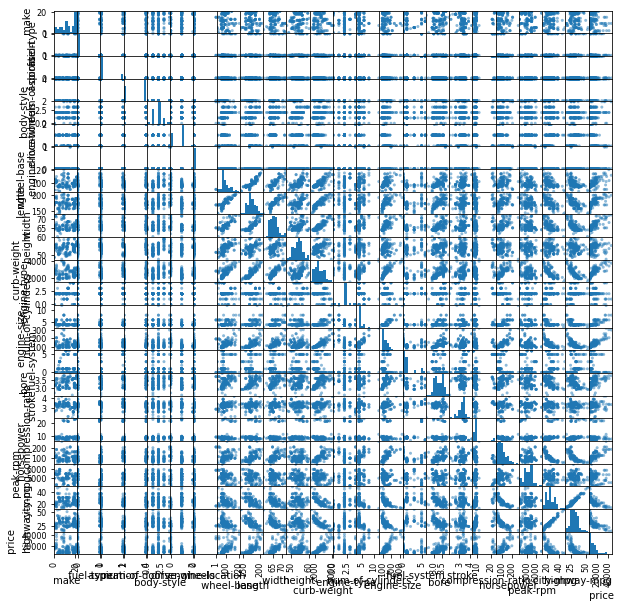

In [28]:
ax = pd.plotting.scatter_matrix(Data,figsize = (10,10))

- Colinearity refers to a situation in which two or more predictor variables in a linear regression model are highly correlated with each other.

- In the case of perfect colinearity, where two or more predictor variables have a perfect linear relationship with each other, the matrix of predictor variable values becomes singular, and the inverse of this matrix does not exist. This is because the determinant of the matrix is zero.

- When there is high colinearity, the standard errors of the regression coefficients become large, which can make it difficult to detect statistically significant relationships between the predictor variables and the outcome variable. The formula for the standard error of the regression coefficient for a predictor variable j is:
$$
SE(b_j) = sqrt(MSE / ((n - k) Var(X_j)))
$$

where MSE is the mean squared error of the regression, n is the sample size, k is the number of predictor variables in the model, and Var(X_j) is the variance of the predictor variable X_j.

- In conclusion, correlation and functional dependence is convinient between our target and features, but not between features itself.

### Excercise 
1. <font color='red'> Relate price (target) to a subset of features </font>
2. <font color='red'> Relate  subset of features ' city-mpg',' length',' engine-size' between themselves </font>

* In theory we will explain why it is usefull, but first try to understand

In [29]:
print(Data.columns.values)

[' make' ' fuel-type' ' aspiration' ' num-of-doors' ' body-style'
 ' drive-wheels' ' engine-location' ' wheel-base' ' length' ' width'
 ' height' ' curb-weight' ' engine-type' ' num-of-cylinders'
 ' engine-size' ' fuel-system' ' bore' ' stroke' ' compression-ratio'
 ' horsepower' ' peak-rpm' ' city-mpg' ' highway-mpg' ' price']


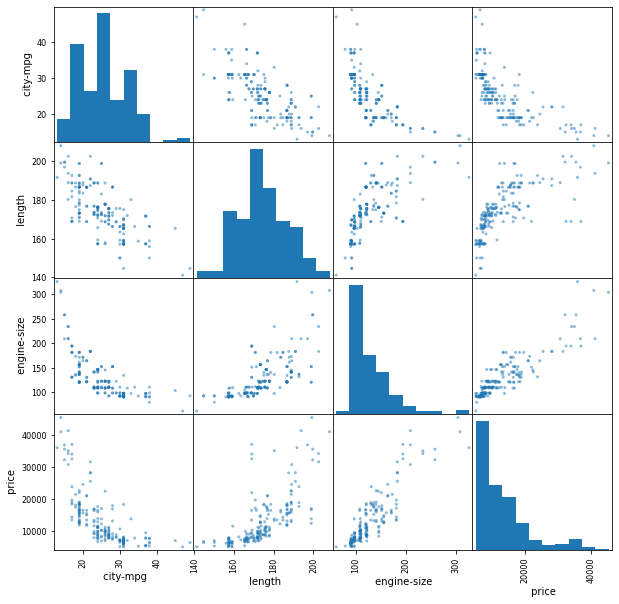

In [30]:
ax = pd.plotting.scatter_matrix(Data[[' city-mpg',' length',' engine-size',' price']],figsize = (10,10))

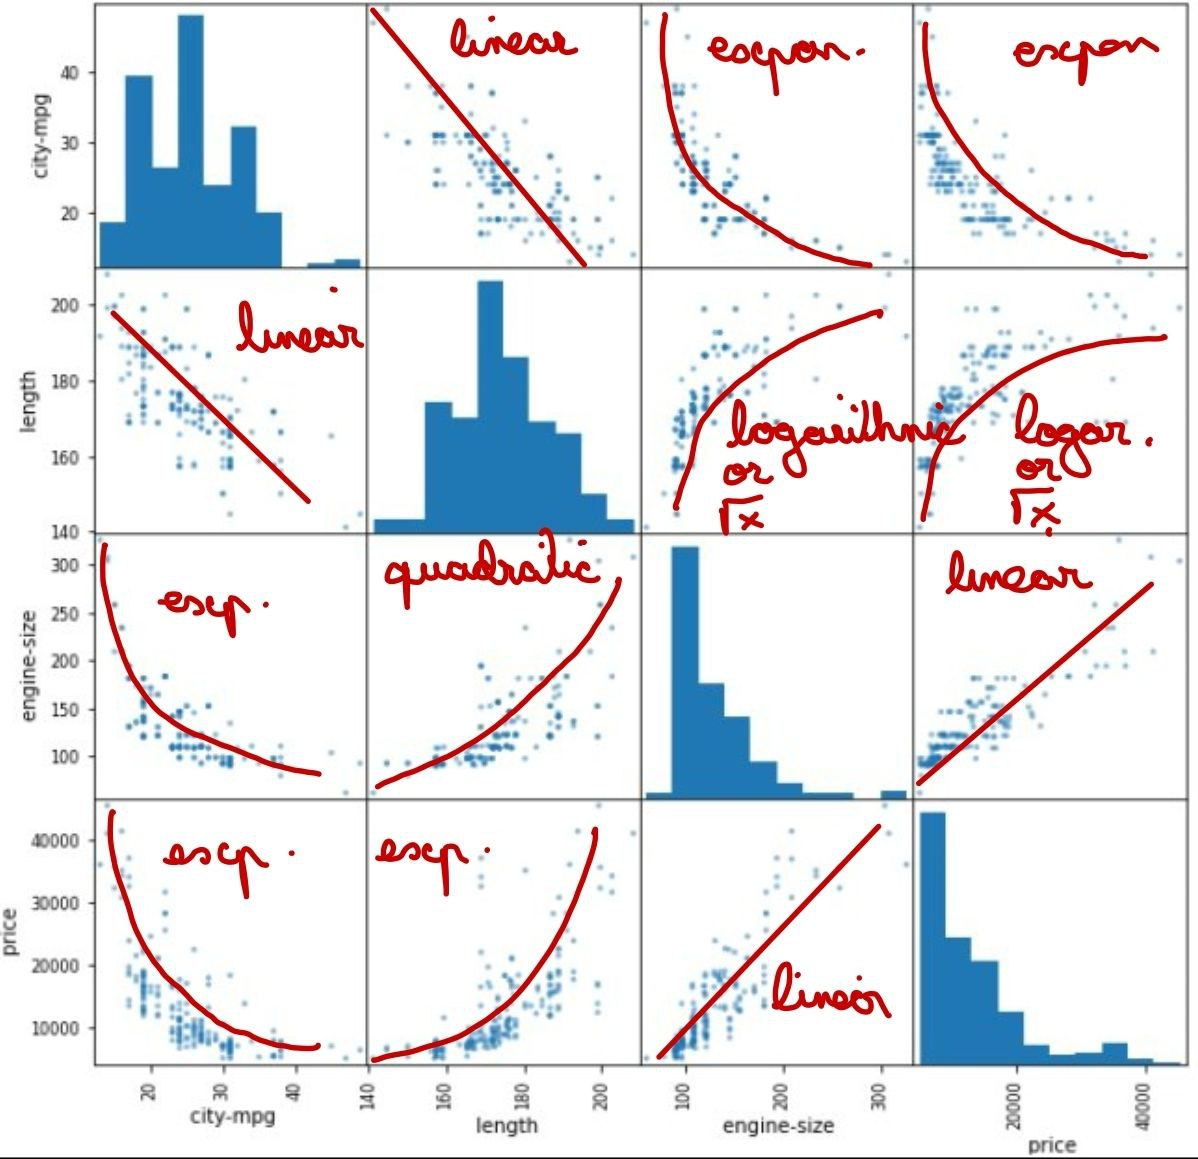

In [31]:
from IPython.display import Image
Image(filename='aaa.jpg', width=600, height=300)

We did the similar things in the last practice.
- Focus on last row: Price has a linear dependence with engine-size and an exponential dependence with both length and city-mpg.
- Length and city-mpg have a linear dependency, which is not good news due to colinearity.
    Other relations between variables are written in the picture.

 ## Now we will make a model that predicts the price given the features
 ###  Note that it will be a linear model. 
 
 * The scatter plot indicates that possibly we could use second order polynomials for fitting, but we have freedom for deciding the model.
 * There are other considerations for prefering a **linear model**.
 ###  First we create the database.

In [32]:
Input = Data[[' make', ' wheel-base' ,' length', ' width' ,' height', ' curb-weight',
 ' engine-size', ' compression-ratio', ' city-mpg', ' highway-mpg']]
Price = Data[[' price']]

### Next we estimate the parameters by **min squares**

In [33]:
from sklearn import linear_model
CarPrice = linear_model.LinearRegression()
CarPrice.fit (Input, Price)

print(CarPrice.coef_)
print(CarPrice.intercept_)

[[-140.63962856 -137.33578327  -40.70842587  696.97055214  397.94315481
     1.8924523   126.74274452  156.76539746 -428.78843721  261.12632032]]
[-51506.16714637]


## We will see how it works over the training database.
### Note that the correct way is to use a validation database, which we will see in the future

In [34]:
PredictedPrice  = CarPrice.predict(Input)

### Scatter plot. 
* Ideal relationship should be linear

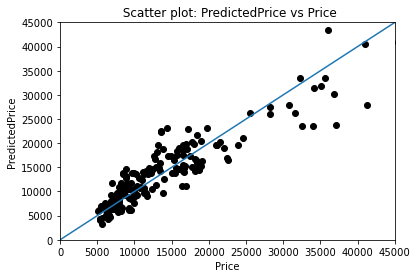

In [35]:
x = np.linspace(0, 45000, 100)
y = x
plt.scatter(Price, PredictedPrice,   color='black')
plt.title(' Scatter plot: PredictedPrice vs Price')
#plt.plot(Price,Price)
plt.plot(x,y)
plt.xlim(0, 45000)
plt.ylim(0, 45000)
plt.xlabel('Price')
plt.ylabel('PredictedPrice')
plt.show()

## Performance of the model on the training database

* Mean squared error:   
 $\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.$
* Explained variance ($R^2$):   
$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

In [36]:
from sklearn.metrics import mean_squared_error
print (f'MSE = {mean_squared_error(Price, PredictedPrice):2.2f} ')
print (f'Root MSE = {np.sqrt(mean_squared_error(Price, PredictedPrice)):2.2f} ')

MSE = 10570057.80 
Root MSE = 3251.16 


In [37]:
from sklearn.metrics import r2_score
print (f'Explained Variance: r^2 = {r2_score(Price, PredictedPrice)*100.:2.2f} %')

Explained Variance: r^2 = 83.76 %


### Excercise: <font color='red'> Repeat the practice with the database **Wine Quality** target (**quality**) </font>

In [38]:
File = "winequality-red.csv"
Filename = os.path.join(os.getcwd(),'Data',File)
print(f'Filename with path: \n {Filename}')
Data = pd.read_csv(Filename)
Data.head().T

Filename with path: 
 C:\Users\raulc\Desktop\Master\Q2\ML\SecondPractice\Data\winequality-red.csv


,0,1,2,3,4
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000
citric acid,0.0000,0.0000,0.040,0.560,0.0000
residual sugar,1.9000,2.6000,2.300,1.900,1.9000
chlorides,0.0760,0.0980,0.092,0.075,0.0760
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100
sulphates,0.5600,0.6800,0.650,0.580,0.5600


In [39]:
TypeOfColumn = Data.dtypes
print(TypeOfColumn)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


Cleaning.

In [40]:
for feature in Data.columns:
    Data =Data[Data[feature] != '?']

All features are numerical so we con start our analysis.

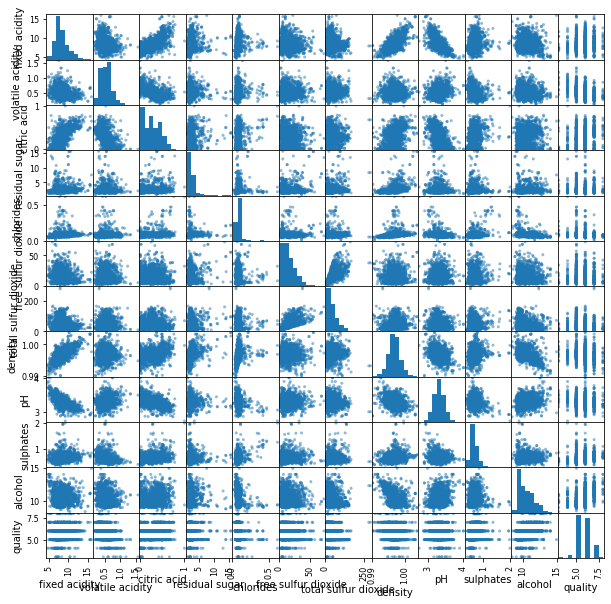

In [41]:
ax = pd.plotting.scatter_matrix(Data,figsize = (10,10))

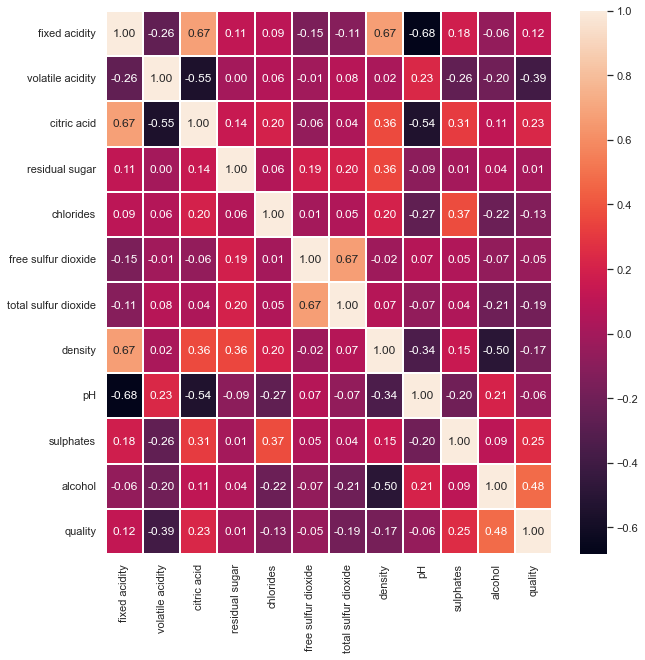

In [42]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(Data.corr(), annot=True, fmt='.2f', linewidth=2)
del sns

We can use the scatter plot as reference and the correlation matrix as reasurance tool to identify undesired colinearities between features of the dataset.

We proceed to do a first analysis:
1. <font color='black'> Relate quality (target) to a subset of features </font>.
2. <font color='black'> Relate  subset of features 'citric acid','fixed acidity','density' and 'volatile acidity' between themselves </font>.

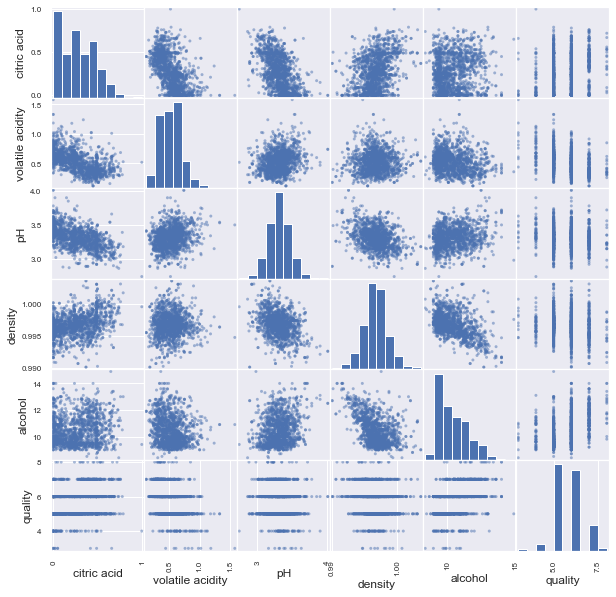

In [43]:
ax = pd.plotting.scatter_matrix(Data[['citric acid','volatile acidity','pH', 'density','alcohol','quality']],figsize = (10,10))

- Citric acid has linear dependences with volatile acidity and pH.
- pH and alcohol could also have a linear relationship, however not as strong as last variables.
- Density has linear dependences with citric acid and alchohol as well.

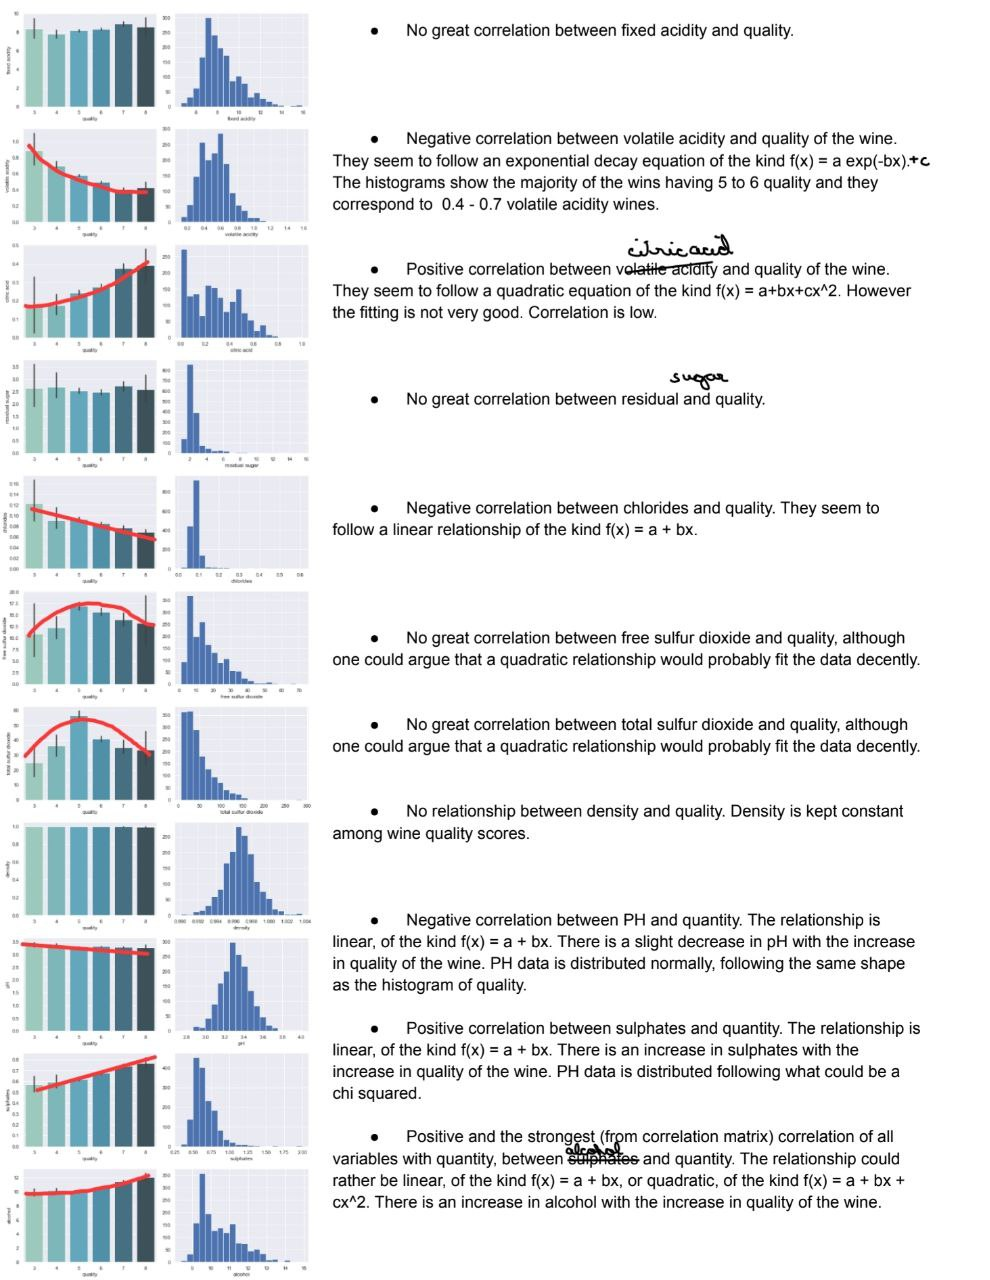

In [44]:
from IPython.display import Image
Image(filename='pp2.png', width=600, height=300)

Here we see, as we did in the first practice, dependences of the different features with respect the target.

We use a naive threshold criterion with respect to correlation in order to consider prediction features.

In [45]:
threshold = 0.15
selected_features = Data.corr()[abs(Data.corr()['quality']) > threshold].index.tolist()
# But take the target out of predicting features!! Important!
selected_features = selected_features[:-1]

In [46]:
Input = Data[selected_features]
Quality = Data[['quality']]
Input

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol
0,0.700,0.00,34.0,0.99780,0.56,9.4
1,0.880,0.00,67.0,0.99680,0.68,9.8
2,0.760,0.04,54.0,0.99700,0.65,9.8
3,0.280,0.56,60.0,0.99800,0.58,9.8
4,0.700,0.00,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...
1594,0.600,0.08,44.0,0.99490,0.58,10.5
1595,0.550,0.10,51.0,0.99512,0.76,11.2
1596,0.510,0.13,40.0,0.99574,0.75,11.0
1597,0.645,0.12,44.0,0.99547,0.71,10.2


In [47]:
from sklearn import linear_model
Winequality = linear_model.LinearRegression()
Winequality.fit(Input, Quality)

print(Winequality.coef_)
print(Winequality.intercept_)

[[-1.24685146e+00 -9.27891216e-02 -2.17364449e-03  9.81954383e+00
   7.09969505e-01  3.04586577e-01]]
[-7.00927972]


In [48]:
PredictedQuality  = Winequality.predict(Input)

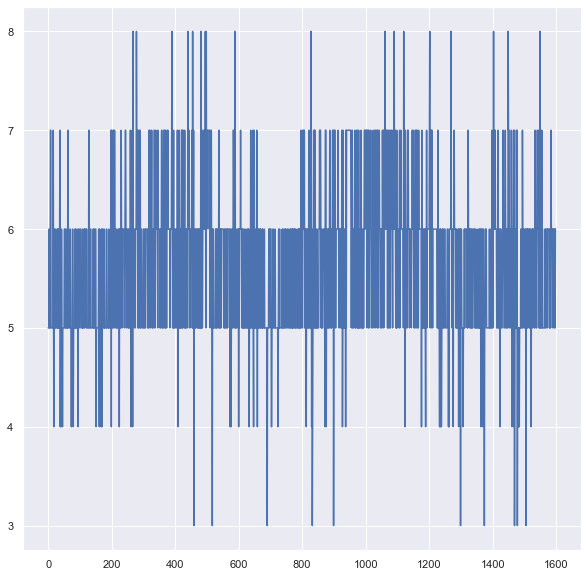

In [49]:
plt.plot(Quality)

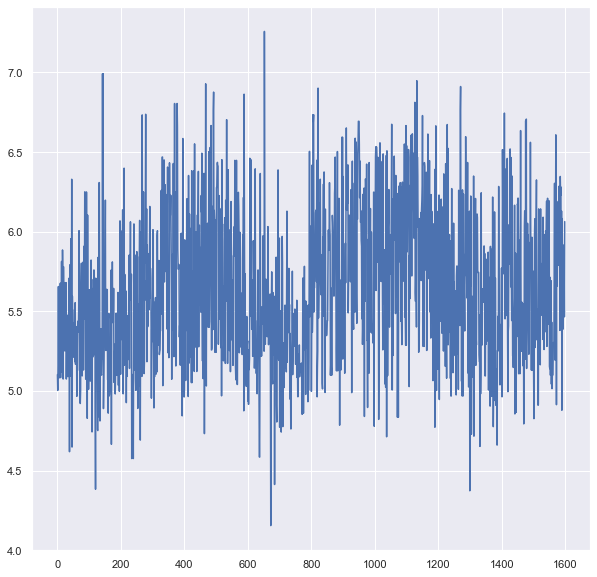

In [50]:
plt.plot(PredictedQuality)

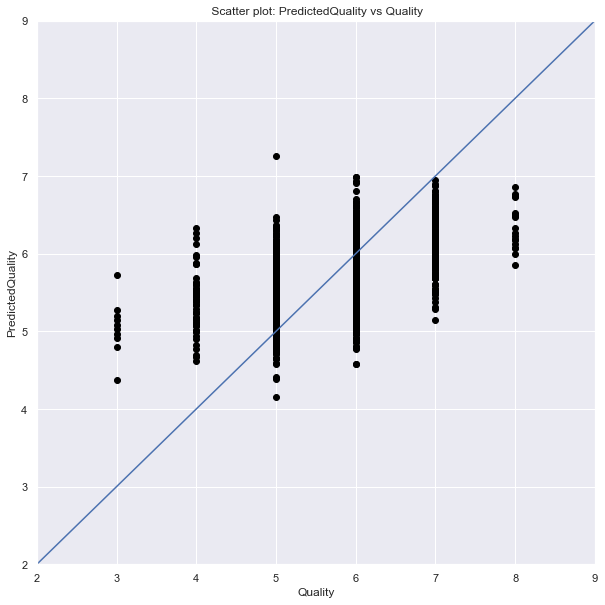

In [51]:
x = np.linspace(0,10,10)
y = x
plt.scatter(Quality, PredictedQuality,   color='black')
#plt.plot(Quality,Quality)
plt.title(' Scatter plot: PredictedQuality vs Quality')
plt.plot(x, y)
plt.xlim(2,9)
plt.ylim(2,9)
plt.xlabel('Quality')
plt.ylabel('PredictedQuality')
plt.show()

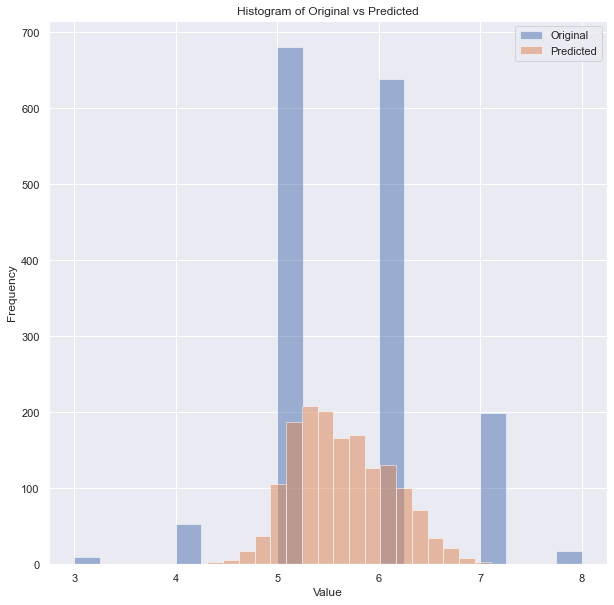

In [52]:
fig, ax = plt.subplots()

ax.hist(Quality, bins=20, alpha=0.5, label='Original')
ax.hist(PredictedQuality, bins=20, alpha=0.5, label='Predicted')

ax.legend(loc='upper right')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Original vs Predicted')

plt.show()

Some metrics of our linear regression model.

In [53]:
from sklearn.metrics import mean_squared_error
print (f'MSE = {mean_squared_error(Quality, PredictedQuality):2.2f} ')
print (f'Root MSE = {np.sqrt(mean_squared_error(Quality, PredictedQuality)):2.2f} ')

MSE = 0.43 
Root MSE = 0.65 


In [54]:
from sklearn.metrics import r2_score
print (f'Explained Variance: r^2 = {r2_score(Quality, PredictedQuality)*100.:2.2f} %')

Explained Variance: r^2 = 34.41 %


Somo thoughts... 
1. My model is working very poorly.
2. Does it make sense to do a linear regression in a problem where the target value is discrete? Probably not!! We try to use logistc regression for this purpouse.

In [55]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score

# Ensure that y is a 1-dimensional array
Quality = np.ravel(Quality)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Input, Quality, test_size=0.2, random_state=42)

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.553125


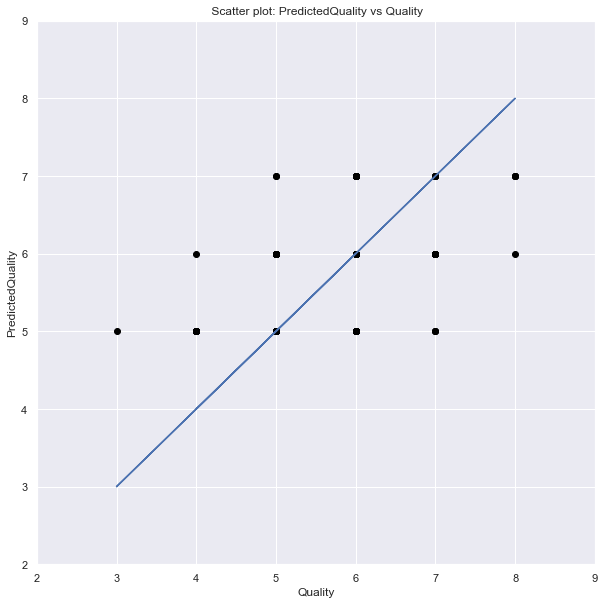

In [56]:
plt.scatter(y_test, y_pred,   color='black')
plt.title(' Scatter plot: PredictedQuality vs Quality')
plt.plot(y_test,y_test)
plt.xlim(2,9)
plt.ylim(2,9)
plt.xlabel('Quality')
plt.ylabel('PredictedQuality')
plt.show()

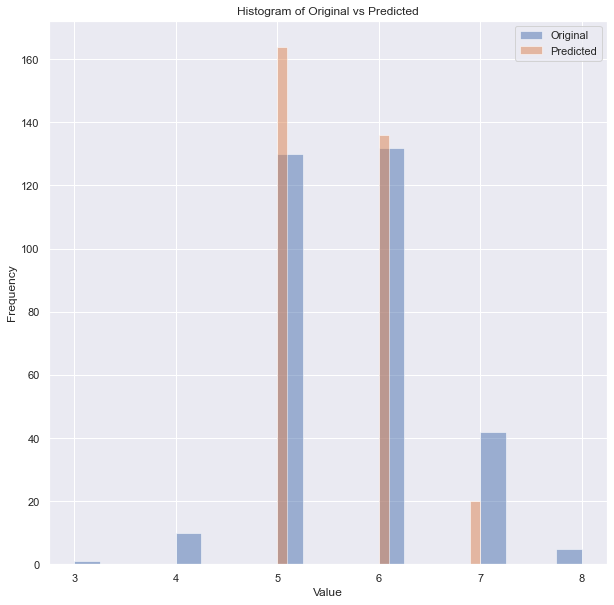

In [57]:
fig, ax = plt.subplots()

ax.hist(y_test, bins=20, alpha=0.5, label='Original')
ax.hist(y_pred, bins=20, alpha=0.5, label='Predicted')

ax.legend(loc='upper right')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Original vs Predicted')

plt.show()

Finally, some metrics of our logistic regression model.

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Compute the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.553125
Precision: 0.5489082675753229
Recall: 0.553125
F1 score: 0.5191716901011729


Final comment:
- By the unbalanceness (I don't even know if that word exists) of data in the target attribute, predictions are biased.
- This poor performances may have it's fundation in the collinearity commented in early stages of the analysis.
- Outliers clearly affect the performance of our model as well.

## Appendix:
### Description of the variables
 1. make: The name of the produces of the car (a factor).
 - alfa-romero, audi, bmw, chevrolet, dodge, honda,  isuzu, jaguar, mazda, mercedes-benz, mercury,mitsubishi, nissan, peugot, plymouth, porsche,renault, saab, subaru, toyota, volkswagen, volvo
 
2. fuel-type: The type of fuel used by the car, either diesel or gas (a factor).
 - diesel, gas.
3. aspiration:	Type of aspiration of fuel in the motor
- std, turbo.
4. num-of-doors: The number of passenger doors, either two or four (a factor).
 - four, two.
5. body-styleThe type of the car (a factor).
- hardtop, wagon, sedan, hatchback, convertible.
6. drive-wheels: The wheels powered by the engine (a factor).
- 4wd, fwd, rwd.
7. engine-location: The location in the car of the engine (a factor).
- front, rear.
8. wheel-base: The distance between the centers of the front and rear wheels in inches (numeric).	
- continuous from 86.6 120.9.
9. length: The length of the body of the car in inches (numeric).
- continuous from 141.1 to 208.1.
10. width: The width of the body of the car in inches (numeric).
- continuous from 60.3 to 72.3.
11. height: The height of the car in inches (numeric).
- continuous from 47.8 to 59.8.
12. curb-weight: The total weight in pounds of a vehicle with standard equipment and a full tank of fuel, but with no passengers or cargo (numeric).	 
- continuous from 1488 to 4066.
13. engine-type: Mechanical Feature  (numeric).	 
- dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
14. num-of-cylinders:: Mechanical Feature  (a factor).
- eight, five, four, six, three, twelve, two.
15. engine-size: The volume swept by all the pistons inside the cylinders in cubic inches (numeric).
 - continuous from 61 to 326.
16. fuel-system: Mechanical Feature  (a factor).
- 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
17. bore: Mechanical Feature  (numeric).	
- continuous from 2.54 to 3.94.
18. stroke: Mechanical Feature  (numeric).	 
- continuous from 2.07 to 4.17.
19. compression-ratio: Mechanical Feature  (numeric).	  
- continuous from 7 to 23.
20. horsepower: The power of the engine in horsepowers (numeric).	
- continuous from 48 to 288.
21. peak-rpm: The top speed of the engine in rounds-per-minute (numeric).
- continuous from 4150 to 6600.
22. city-mpg: The fuel consumption of the car in city driving conditions, measured as miles per gallon of fuel (numeric).	 
- continuous from 13 to 49.
23. highway-mpg: The fuel consumption of the car in highway driving conditions, measured as miles per gallon of fuel (numeric).	 
- continuous from 16 to 54.
24. price: The retail price of the car in US Dollars (numeric).	
- continuous from 5118 to 45400.

    

## Description of variables: Wine  quality
### Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
Output variable (based on sensory data): 
12. quality (score between 0 and 10)
